In [1]:
import os
# import urllib2
import pandas as pd
import urllib.request, json
from pprint import pprint
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import datetime

In [2]:
state = 'IA'

In [3]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    states_historical = json.loads(url.read().decode())
#     pprint(states_historical)

In [4]:
state_historical_df = json_normalize(states_historical[0:]).fillna(0)
state_historical_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200426,AK,341.0,15836.0,0.0,14.0,0.0,0.0,0.0,0.0,...,0.0,16177.0,16177.0,16177.0,02,0.0,0.0,443.0,2.0,445.0
1,20200426,AL,6270.0,67281.0,0.0,0.0,845.0,0.0,288.0,0.0,...,845.0,73551.0,73551.0,73551.0,01,4.0,6.0,2074.0,133.0,2207.0
2,20200426,AR,2941.0,36528.0,0.0,104.0,291.0,0.0,0.0,25.0,...,291.0,39469.0,39469.0,39469.0,05,2.0,0.0,1304.0,112.0,1416.0
3,20200426,AS,0.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,20200426,AZ,6526.0,58285.0,0.0,671.0,1037.0,308.0,0.0,200.0,...,1037.0,64811.0,64811.0,64811.0,04,9.0,15.0,2057.0,246.0,2303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,20200126,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
2925,20200125,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
2926,20200124,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
2927,20200123,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0


In [5]:
state_historical_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'hash', 'dateChecked', 'death', 'hospitalized', 'total',
       'totalTestResults', 'posNeg', 'fips', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease'],
      dtype='object')

In [6]:
n_by_state = state_historical_df.groupby("state")["date","positive"].bfill()
n_by_state.head()

,date,positive
0,20200426,341.0
1,20200426,6270.0
2,20200426,2941.0
3,20200426,0.0
4,20200426,6526.0


In [7]:


# for i in range(1, len(state_df)):
#     state=state_historical_df.loc[i+1, 'state']
#     print(state)
        
        
        
        
#         state=state
#     elif state_df[i+1, 'state'] != state:
#         state_df[i+1, 'state'] = state
        
        
    
    
# for i in range(2, len(state_df)):
#     state_df.loc[i, '3 Day Pos Inc Avg'] = (state_df.loc[i, 'Positives Increase'] + 
#     state_df.loc[i-1, 'Positives Increase'] + 
#     state_df.loc[i-2, 'Positives Increase'])/3
# state_df.fillna(0)


In [8]:

state_df = state_historical_df.loc[state_historical_df['state'] == state]
state_df = state_df[['state', 'date', 'positive', 'positiveIncrease','negative', 'negativeIncrease', 
                     'totalTestResults', 'totalTestResultsIncrease', 'hospitalized', 'hospitalizedIncrease',
                     'death', 'deathIncrease']].fillna(0)

state_df = state_df.iloc[::-1]
state_df['date'] = pd.to_datetime(state_df['date'].astype(str), format='%Y%m%d')
state_df = state_df.reset_index(drop=True)

state_df.rename(columns = {'state':'State', 'date':'Date', 'positive':'Positive Cases', 'positiveIncrease':'Positives Increase',
                           'negative':'Negative Cases', 'negativeIncrease':'Negatives Increase', 'totalTestResults':'Total Tests',
                           'totalTestResultsIncrease':'Total Tests Increase', 'hospitalized':'Hospitalized',
                           'hospitalizedIncrease':'Hospitalized Increase', 'death':'Deaths', 'deathIncrease':'Deaths Increase'}, inplace = True)
# state_df.drop(['date'])

state_df

,State,Date,Positive Cases,Positives Increase,Negative Cases,Negatives Increase,Total Tests,Total Tests Increase,Hospitalized,Hospitalized Increase,Deaths,Deaths Increase
0,IA,2020-03-06,0.0,0.0,15.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
1,IA,2020-03-07,0.0,0.0,15.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
2,IA,2020-03-08,0.0,0.0,15.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
3,IA,2020-03-09,3.0,3.0,26.0,11.0,29.0,14.0,0.0,0.0,0.0,0.0
4,IA,2020-03-10,8.0,5.0,32.0,6.0,40.0,11.0,0.0,0.0,0.0,0.0
5,IA,2020-03-11,13.0,5.0,46.0,14.0,59.0,19.0,0.0,0.0,0.0,0.0
6,IA,2020-03-12,14.0,1.0,67.0,21.0,81.0,22.0,0.0,0.0,0.0,0.0
7,IA,2020-03-13,16.0,2.0,83.0,16.0,99.0,18.0,0.0,0.0,0.0,0.0
8,IA,2020-03-14,17.0,1.0,83.0,0.0,100.0,1.0,0.0,0.0,0.0,0.0
9,IA,2020-03-15,18.0,1.0,83.0,0.0,101.0,1.0,0.0,0.0,0.0,0.0


In [9]:
state_df.insert(loc=4, column='3 Day Pos Inc Avg', value ='')

for i in range(2, len(state_df)):
    state_df.loc[i, '3 Day Pos Inc Avg'] = (state_df.loc[i, 'Positives Increase'] + 
    state_df.loc[i-1, 'Positives Increase'] + 
    state_df.loc[i-2, 'Positives Increase'])/3
state_df.fillna(0)
    
state_df

,State,Date,Positive Cases,Positives Increase,3 Day Pos Inc Avg,Negative Cases,Negatives Increase,Total Tests,Total Tests Increase,Hospitalized,Hospitalized Increase,Deaths,Deaths Increase
0,IA,2020-03-06,0.0,0.0,,15.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
1,IA,2020-03-07,0.0,0.0,,15.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
2,IA,2020-03-08,0.0,0.0,0,15.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
3,IA,2020-03-09,3.0,3.0,1,26.0,11.0,29.0,14.0,0.0,0.0,0.0,0.0
4,IA,2020-03-10,8.0,5.0,2.66667,32.0,6.0,40.0,11.0,0.0,0.0,0.0,0.0
5,IA,2020-03-11,13.0,5.0,4.33333,46.0,14.0,59.0,19.0,0.0,0.0,0.0,0.0
6,IA,2020-03-12,14.0,1.0,3.66667,67.0,21.0,81.0,22.0,0.0,0.0,0.0,0.0
7,IA,2020-03-13,16.0,2.0,2.66667,83.0,16.0,99.0,18.0,0.0,0.0,0.0,0.0
8,IA,2020-03-14,17.0,1.0,1.33333,83.0,0.0,100.0,1.0,0.0,0.0,0.0,0.0
9,IA,2020-03-15,18.0,1.0,1.33333,83.0,0.0,101.0,1.0,0.0,0.0,0.0,0.0


In [10]:
state_df.insert(loc=5, column='7 Day Pos Inc Avg', value ='')

for i in range(7, len(state_df)):
    state_df.loc[i, '7 Day Pos Inc Avg'] = (state_df.loc[i, 'Positives Increase'] + 
    state_df.loc[i-1, 'Positives Increase'] + 
    state_df.loc[i-2, 'Positives Increase'] +
    state_df.loc[i-3, 'Positives Increase'] + 
    state_df.loc[i-4, 'Positives Increase'] +
    state_df.loc[i-5, 'Positives Increase'] + 
    state_df.loc[i-6, 'Positives Increase'])/7
state_df.fillna(0)
    
state_df

,State,Date,Positive Cases,Positives Increase,3 Day Pos Inc Avg,7 Day Pos Inc Avg,Negative Cases,Negatives Increase,Total Tests,Total Tests Increase,Hospitalized,Hospitalized Increase,Deaths,Deaths Increase
0,IA,2020-03-06,0.0,0.0,,,15.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
1,IA,2020-03-07,0.0,0.0,,,15.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
2,IA,2020-03-08,0.0,0.0,0,,15.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
3,IA,2020-03-09,3.0,3.0,1,,26.0,11.0,29.0,14.0,0.0,0.0,0.0,0.0
4,IA,2020-03-10,8.0,5.0,2.66667,,32.0,6.0,40.0,11.0,0.0,0.0,0.0,0.0
5,IA,2020-03-11,13.0,5.0,4.33333,,46.0,14.0,59.0,19.0,0.0,0.0,0.0,0.0
6,IA,2020-03-12,14.0,1.0,3.66667,,67.0,21.0,81.0,22.0,0.0,0.0,0.0,0.0
7,IA,2020-03-13,16.0,2.0,2.66667,2.28571,83.0,16.0,99.0,18.0,0.0,0.0,0.0,0.0
8,IA,2020-03-14,17.0,1.0,1.33333,2.42857,83.0,0.0,100.0,1.0,0.0,0.0,0.0,0.0
9,IA,2020-03-15,18.0,1.0,1.33333,2.57143,83.0,0.0,101.0,1.0,0.0,0.0,0.0,0.0


In [11]:
state_df.insert(loc=10, column='3 Day Testing Inc Avg', value ='')

for i in range(2, len(state_df)):
    state_df.loc[i, '3 Day Testing Inc Avg'] = (state_df.loc[i, 'Total Tests Increase'] + 
    state_df.loc[i-1, 'Total Tests Increase'] + 
    state_df.loc[i-2, 'Total Tests Increase'])/3
state_df.fillna(0)
    
state_df

,State,Date,Positive Cases,Positives Increase,3 Day Pos Inc Avg,7 Day Pos Inc Avg,Negative Cases,Negatives Increase,Total Tests,Total Tests Increase,3 Day Testing Inc Avg,Hospitalized,Hospitalized Increase,Deaths,Deaths Increase
0,IA,2020-03-06,0.0,0.0,,,15.0,0.0,15.0,0.0,,0.0,0.0,0.0,0.0
1,IA,2020-03-07,0.0,0.0,,,15.0,0.0,15.0,0.0,,0.0,0.0,0.0,0.0
2,IA,2020-03-08,0.0,0.0,0,,15.0,0.0,15.0,0.0,0,0.0,0.0,0.0,0.0
3,IA,2020-03-09,3.0,3.0,1,,26.0,11.0,29.0,14.0,4.66667,0.0,0.0,0.0,0.0
4,IA,2020-03-10,8.0,5.0,2.66667,,32.0,6.0,40.0,11.0,8.33333,0.0,0.0,0.0,0.0
5,IA,2020-03-11,13.0,5.0,4.33333,,46.0,14.0,59.0,19.0,14.6667,0.0,0.0,0.0,0.0
6,IA,2020-03-12,14.0,1.0,3.66667,,67.0,21.0,81.0,22.0,17.3333,0.0,0.0,0.0,0.0
7,IA,2020-03-13,16.0,2.0,2.66667,2.28571,83.0,16.0,99.0,18.0,19.6667,0.0,0.0,0.0,0.0
8,IA,2020-03-14,17.0,1.0,1.33333,2.42857,83.0,0.0,100.0,1.0,13.6667,0.0,0.0,0.0,0.0
9,IA,2020-03-15,18.0,1.0,1.33333,2.57143,83.0,0.0,101.0,1.0,6.66667,0.0,0.0,0.0,0.0


In [12]:
state_df.dtypes

State                            object
Date                     datetime64[ns]
Positive Cases                  float64
Positives Increase              float64
3 Day Pos Inc Avg                object
7 Day Pos Inc Avg                object
Negative Cases                  float64
Negatives Increase              float64
Total Tests                     float64
Total Tests Increase            float64
3 Day Testing Inc Avg            object
Hospitalized                    float64
Hospitalized Increase           float64
Deaths                          float64
Deaths Increase                 float64
dtype: object

In [13]:
# state_df["3 Day Pos Inc Avg"] = state_df["3 Day Pos Inc Avg"].astype(str).astype(int)

C:\Users\jener\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


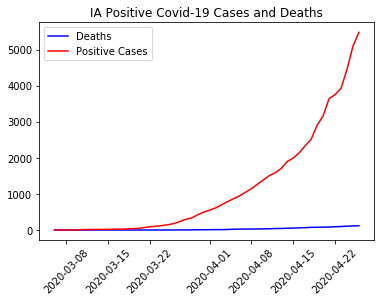

In [14]:
d1 = state_df['Deaths']
d2 = state_df['Positive Cases']
t = state_df['Date']

plt.plot(t, d1, "-b", label="Deaths")
plt.plot(t, d2, "-r", label="Positive Cases")
plt.legend(loc="upper left")
plt.title(state + ' Positive Covid-19 Cases and Deaths')
# plt.set_xticklabels(t, rotation = 45)
plt.xticks(rotation=45)

plt.show()

In [15]:
d1 = state_df['3 Day Pos Inc Avg']
d2 = state_df['7 Day Pos Inc Avg']
t = state_df['Date']

plt.plot(t, d1, "-b", label="3 Day Pos Inc Avg")
plt.plot(t, d2, "-r", label="7 Day Pos Inc Avg")
plt.legend(loc="upper left")
plt.title(state + ' Positive Covid-19 Cases and Deaths')
plt.xticks(rotation=45)

plt.show()

In [16]:
now = datetime.datetime.now()
# print ("Current date and time : ")
today = now.strftime("%m-%d-%Y")
print(today)


04-27-2020


In [17]:
state_df.to_csv(f'./Resources/{state}CovidDaily{today}.csv')